<p style="font-family: 'Script Bold Italic'; font-size: 40px; font-style: italic; font-weight: bold; color: #009b90; margin: 0; text-align:center;">
   Olympic History Analysis
</p>

The Olympic Games are a premier international sporting event featuring summer and winter sports competitions. Athletes from around the world participate, representing their nations and embodying the Olympic values of excellence, friendship, and respect. The modern Olympic Games, revived in 1896, have evolved into the most celebrated sporting festival, promoting unity and peace across nations.

### Dataset Overview

This project utilizes the `athlete_events.csv` dataset, which provides detailed records of athlete performances across both Summer and Winter Olympic Games. The dataset spans a wide historical range and is instrumental for various analyses of Olympic history, trends, and achievements.

**Key columns in the dataset:**
- **ID:** Unique identifier for each athlete
- **Name:** Athlete's full name
- **Sex:** Gender (M for male, F for female)
- **Age:** Athlete's age at the time of competition
- **Height:** Height in centimeters
- **Weight:** Weight in kilograms
- **Team:** Team or country name
- **NOC:** National Olympic Committee 3-letter code
- **Games:** Year and season of the Games (e.g., 2012 Summer)
- **Year:** Year of the event
- **Season:** Summer or Winter Games
- **City:** Host city of the event
- **Sport:** Sport category (e.g., Athletics, Swimming)
- **Event:** Specific event within the sport (e.g., 100m Freestyle)
- **Medal:** Medal won (Gold, Silver, Bronze, or NA if no medal was awarded)

This dataset enables comprehensive analyses, including tracking athlete achievements, uncovering historical trends, and visualizing the evolution of the Olympic Games.


### Data Import and Visualization Setup

In [177]:
# Numerical and Data Manipulation Libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# Visualization Libraries
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For statistical data visualization
import plotly.express as px  # For interactive visualizations
import plotly.figure_factory as ff  # For advanced plotly figures

# Utility Libraries
from collections import Counter  # For counting hashable objects
import warnings  # To handle warning messages
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [178]:
# Load the athlete events dataset
df = pd.read_csv('athlete_events.csv')

# Load the regions dataset (NOC codes and corresponding country/region names)
region_df = pd.read_csv('noc_regions.csv')

In [179]:
# Preview the first 5 rows of the main dataset
print("First 5 rows of athlete_events")
display(df.head())

First 5 rows of athlete_events.csv:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [180]:
# Preview the last 5 rows of the main dataset
print("Last 5 rows of athlete_events")
display(df.tail())

Last 5 rows of athlete_events.csv:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


> ### Filter Summer Olympics

In [182]:
# Check the initial dataset shape (rows, columns)
print("Original dataset shape:", df.shape)

Original dataset shape: (271116, 15)


In [183]:
# Filter the dataset to include only Summer Olympic Games
df = df[df['Season'] == 'Summer']

In [184]:
# Check the shape after filtering
print("Dataset shape after keeping only Summer Olympics:", df.shape)

Dataset shape after keeping only Summer Olympics: (222552, 15)


> ### Data Cleaning and Preparation

In [181]:
# Preview the regions dataset as well
print("First 5 rows of noc_regions")
display(region_df.head())

First 5 rows of noc_regions.csv:


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [185]:
# Merge the main dataset with region information
df = df.merge(region_df, on='NOC', how='left')

In [186]:
# Preview the last 5 rows after merging
print("Last 5 rows after merge:")
display(df.tail())

Last 5 rows after merge:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [187]:
# Inspect unique regions (countries/teams)
print("Unique regions (countries/teams):")
print(df['region'].unique())

Unique regions (countries/teams):
['China' 'Denmark' 'Netherlands' 'Finland' 'Norway' 'Romania' 'Estonia'
 'France' 'Morocco' 'Spain' 'Egypt' 'Iran' 'Bulgaria' 'Italy' 'Chad'
 'Azerbaijan' 'Sudan' 'Russia' 'Argentina' 'Cuba' 'Belarus' 'Greece'
 'Cameroon' 'Turkey' 'Chile' 'Mexico' 'USA' 'Nicaragua' 'Hungary'
 'Nigeria' 'Algeria' 'Kuwait' 'Bahrain' 'Pakistan' 'Iraq' 'Syria'
 'Lebanon' 'Qatar' 'Malaysia' 'Germany' 'Canada' 'Ireland' 'Australia'
 'South Africa' 'Eritrea' 'Tanzania' 'Jordan' 'Tunisia' 'Libya' 'Belgium'
 'Djibouti' 'Palestine' 'Comoros' 'Kazakhstan' 'Brunei' 'India'
 'Saudi Arabia' 'Maldives' 'Ethiopia' 'United Arab Emirates' 'Yemen'
 'Indonesia' 'Philippines' nan 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan'
 'Japan' 'Republic of Congo' 'Switzerland' 'Brazil' 'Monaco' 'Israel'
 'Uruguay' 'Sweden' 'Sri Lanka' 'Armenia' 'Ivory Coast' 'Kenya' 'Benin'
 'UK' 'Ghana' 'Somalia' 'Niger' 'Mali' 'Afghanistan' 'Poland' 'Costa Rica'
 'Panama' 'Georgia' 'Slovenia' 'Guyana' 'New Zealand' 'Port

In [188]:
# Count number of unique regions
print("Number of unique regions:", df['region'].unique().shape[0])

Number of unique regions: 206


In [189]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 1385


In [190]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

In [191]:
# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
ID             0
Name           0
Sex            0
Age         9030
Height     50500
Weight     52506
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     187090
region       370
notes     216770
dtype: int64


In [192]:
# Display medal distribution
print("\nMedal count distribution:")
print(df['Medal'].value_counts(dropna=False))


Medal count distribution:
Medal
NaN       187090
Gold       11456
Bronze     11409
Silver     11212
Name: count, dtype: int64


In [193]:
# One-hot encode the 'Medal' column (Gold/Silver/Bronze/NaN)
df = pd.concat([df, pd.get_dummies(df['Medal']).astype(int)], axis=1)

In [194]:
# Preview the updated DataFrame
print("\nData preview with one-hot encoded medals:")
display(df.head())


Data preview with one-hot encoded medals:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [195]:
# Check the current shape of the DataFrame
print("Current dataset shape:", df.shape)

Current dataset shape: (221167, 20)


> ### Medal Tally

In [196]:
# Group by NOC (National Olympic Committee) and sum the medal columns
noc_medal_tally = (
    df.groupby('NOC')[['Gold', 'Silver', 'Bronze']]
    .sum()
    .sort_values('Gold', ascending=False)
    .reset_index()
)
print("Top NOCs by Gold medals:")
display(noc_medal_tally.head())

Top NOCs by Gold medals:


,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454


In [197]:
# Remove duplicate entries for each medal awarded (to avoid double counting)
# Duplicates are dropped based on Team, NOC, Games, Year, City, Sport, Event, and Medal
medal_tally = df.drop_duplicates(
    subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal']
)

In [198]:
# Group by region and sum the medal columns
region_medal_tally = (
    medal_tally.groupby('region')[['Gold', 'Silver', 'Bronze']]
    .sum()
    .sort_values('Gold', ascending=False)
    .reset_index()
)

In [199]:
# Add a 'total' column for total medals per region
region_medal_tally['total'] = (
    region_medal_tally['Gold'] +
    region_medal_tally['Silver'] +
    region_medal_tally['Bronze']
)

print("Medal tally by region (top 10):")
display(region_medal_tally.head(10))

Medal tally by region (top 10):


,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
5,China,228,163,154,545
6,Italy,219,191,198,608
7,Hungary,178,154,172,504
8,Sweden,150,175,188,513
9,Australia,150,171,197,518


> ### Years List 

In [200]:
# Extract unique years from the dataset for analysis or filtering
years = df['Year'].unique().tolist()

In [201]:
# Sort the years in ascending order
years.sort()

In [202]:
# Insert 'Overall' at the beginning for use in dropdowns or summary analysis
years.insert(0, 'Overall')

In [205]:
# Display the years list
print("List of Olympic years (with 'Overall' included):")
print(years)

List of Olympic years (with 'Overall' included):
['Overall', 1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]


> ### Country List 

In [206]:
# Extract unique countries/regions from the 'region' column (excluding NaN)
countries = np.unique(df['region'].dropna().values).tolist()

In [207]:
# Sort the country list alphabetically
countries.sort()

In [208]:
# Insert 'Overall' at the start for aggregate selection in filters/menus
countries.insert(0, 'Overall')

In [209]:
# Display the countries list
print("List of countries/regions (with 'Overall' included):")
print(countries)

List of countries/regions (with 'Overall' included):
['Overall', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Boliva', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau'

> ### Medal Tally Function

In [217]:
# Remove duplicate medals for accurate tally
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [218]:
def fetch_medal_tally(year, country):
    flag = 0

    if year == 'Overall' and country == 'Overall':
        flag = 1
    elif (year == 'Overall' and country != 'Overall') or (year != 'Overall' and country == 'Overall'):
        flag = 2
        temp_df = medal_df[medal_df['region'] == country]
    elif year != 'Overall' and country != 'Overall':
        flag = 3
        temp_df = medal_df[(medal_df['region'] == country) & (medal_df['Year'] == int(year))]
    elif year == 'Overall' and country != 'Overall':
        flag = 4
        temp_df = medal_df[medal_df['region'] == country]
    elif (year == 'Overall' and country == 'Overall') or (year != 'Overall' and country != 'Overall'):
        flag = 5
        temp_df = medal_df

    if flag == 1:
        x = medal_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year', ascending=False).reset_index()
    elif flag == 2:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year', ascending=False).reset_index()
    elif flag == 3:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year', ascending=False).reset_index()
    elif flag == 4:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year', ascending=False).reset_index()
    elif flag == 5:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year', ascending=False).reset_index()

    return x

In [219]:
# Example usage:
fetch_medal_tally(year='Overall', country ='USA')

,Year,Gold,Silver,Bronze
0,2016,46,37,38
1,2012,46,28,29
2,2008,36,39,35
3,2004,36,39,26
4,2000,36,24,31
5,1996,44,32,25
6,1992,37,34,37
7,1988,36,31,27
8,1984,82,61,30
9,1976,34,35,25


# Overall Analysis
- No. of editions
- No. of cities
- No. of events/sports
- No. of athletes
- participating nations

In [220]:
# Number of unique editions (Olympic years)
num_editions = df['Year'].nunique()
print(f"Number of Editions: {num_editions}")

Number of Editions: 29


In [41]:
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896])

Also, `more stress was placed on the continuing sequence of four-year Olympiads, and the Games of 1906 did not fit into this.` Hence, the IOC currently does not recognise Athens 1906 as Olympic Games, and does not regard any events occurring there (such as the setting of new records or the winning of medals) as official.

In [42]:
df['Year'].unique().shape[0] -1

28

In [221]:
# Number of unique host cities
num_cities = df['City'].nunique()
print(f"Number of Host Cities: {num_cities}")

Number of Host Cities: 23


 A total of `23 different cities` have hosted the Summer Olympics. 

In [224]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [225]:
# Number of unique sports
num_sports = df['Sport'].nunique()
print(f"Number of Sports: {num_sports}")

Number of Sports: 52


In [228]:
# Number of unique events
num_events = df['Event'].nunique()
print(f"Number of Events: {num_events}")

Number of Events: 651


In [229]:
# Number of unique athletes
num_athletes = df['Name'].nunique()
print(f"Number of Athletes: {num_athletes}")

Number of Athletes: 116122


In [233]:
# Number of unique nations/regions (excluding NaN)
num_nations = df['region'].nunique()
print(f"Number of Participating Nations/Regions: {num_nations}")

Number of Participating Nations/Regions: 205


In [235]:
# --- Regions Over Time ---
nations_over_time = (
    df.drop_duplicates(['Year', 'region'])
    .groupby('Year')['region']
    .count()
    .reset_index()
    .rename(columns={'region': 'No of countries', 'Year': 'Edition'})
)

fig = px.line(nations_over_time, x='Edition', y='No of countries', title='Number of Participating regions Over Time')
fig.show()

In [236]:
# --- Events Over Time ---
events_over_time = (
    df.drop_duplicates(['Year', 'Event'])
    .groupby('Year')['Event']
    .count()
    .reset_index()
    .rename(columns={'Event': 'No of Events'})
)

fig = px.line(events_over_time, x='Year', y='No of Events', title='Number of Events Over Time')
fig.show()

In [239]:
# --- Athletes Over Time ---
athletes_over_time = (
    df.drop_duplicates(['Year', 'Name'])
    .groupby('Year')['Name']
    .count()
    .reset_index()
    .rename(columns={'Name': 'No of Athletes'})
)

fig = px.line(athletes_over_time, x='Year', y='No of Athletes', title='Number of Athletes Over Time')
fig.show()

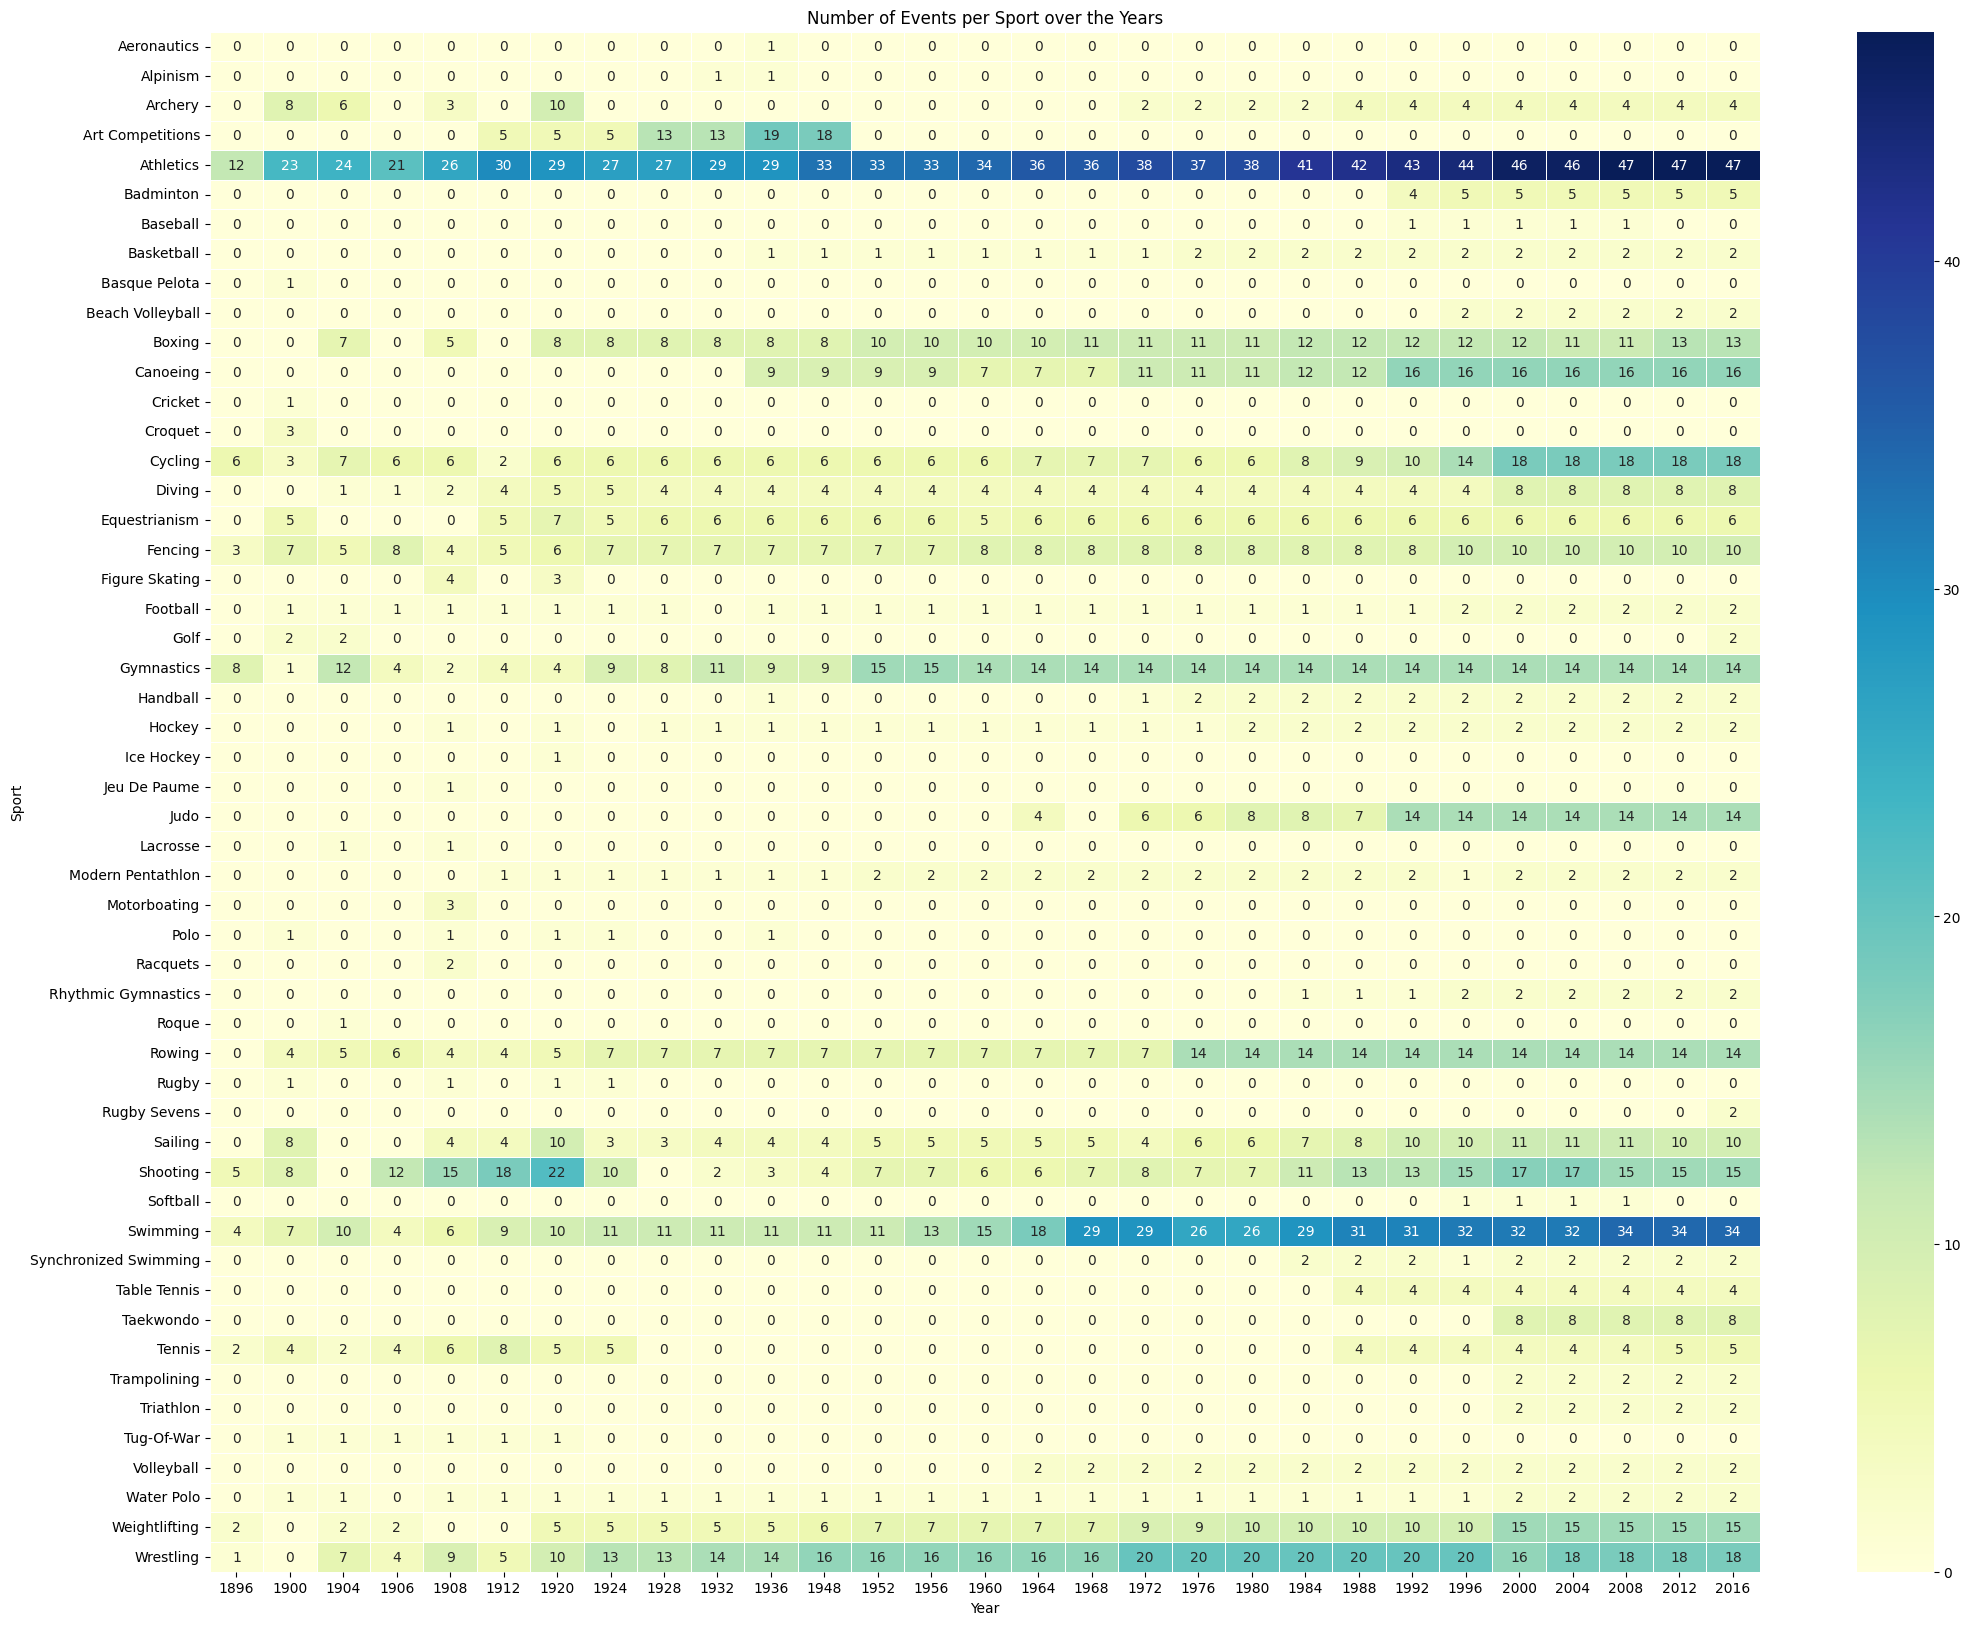

In [240]:
# --- Heatmap: Number of Events per Sport over Years ---
event_matrix = (
    df.drop_duplicates(['Year', 'Sport', 'Event'])
    .pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count')
    .fillna(0)
    .astype(int)
)

plt.figure(figsize=(25, 20))
sns.heatmap(event_matrix, annot=True, linewidths=.5, cmap="YlGnBu")
plt.title('Number of Events per Sport over the Years')
plt.show()

In [244]:
# --- Most Successful Athletes ---
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    x = temp_df['Name'].value_counts().reset_index()
    x.columns = ['Name', 'Medals']
    x = x.head(10).merge(df, left_on='Name', right_on='Name', how='left')[['Name', 'Medals', 'Sport', 'region']].drop_duplicates('Name')
    return x

In [246]:
print("Most Successful Athletes Overall:")
most_successful(df,'Overall')

Most Successful Athletes Overall:


,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


### Country wise
- Countrywise medal tally per year (line plot)
- What countries are good at heatmap
- Most successful Athletes (Top 10)

In [247]:
# --- Country's Medal Tally Over Time (e.g., USA) ---
temp_df = df.dropna(subset=['Medal']).drop_duplicates(
    subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal']
)

In [248]:
# Filter for a specific country, e.g., 'USA'
country = 'USA'
new_df = temp_df[temp_df['region'] == country]
final_df = new_df.groupby('Year')['Medal'].count().reset_index()

fig = px.line(final_df, x='Year', y='Medal', title=f"{country} Medal Tally Over Time")
fig.show()

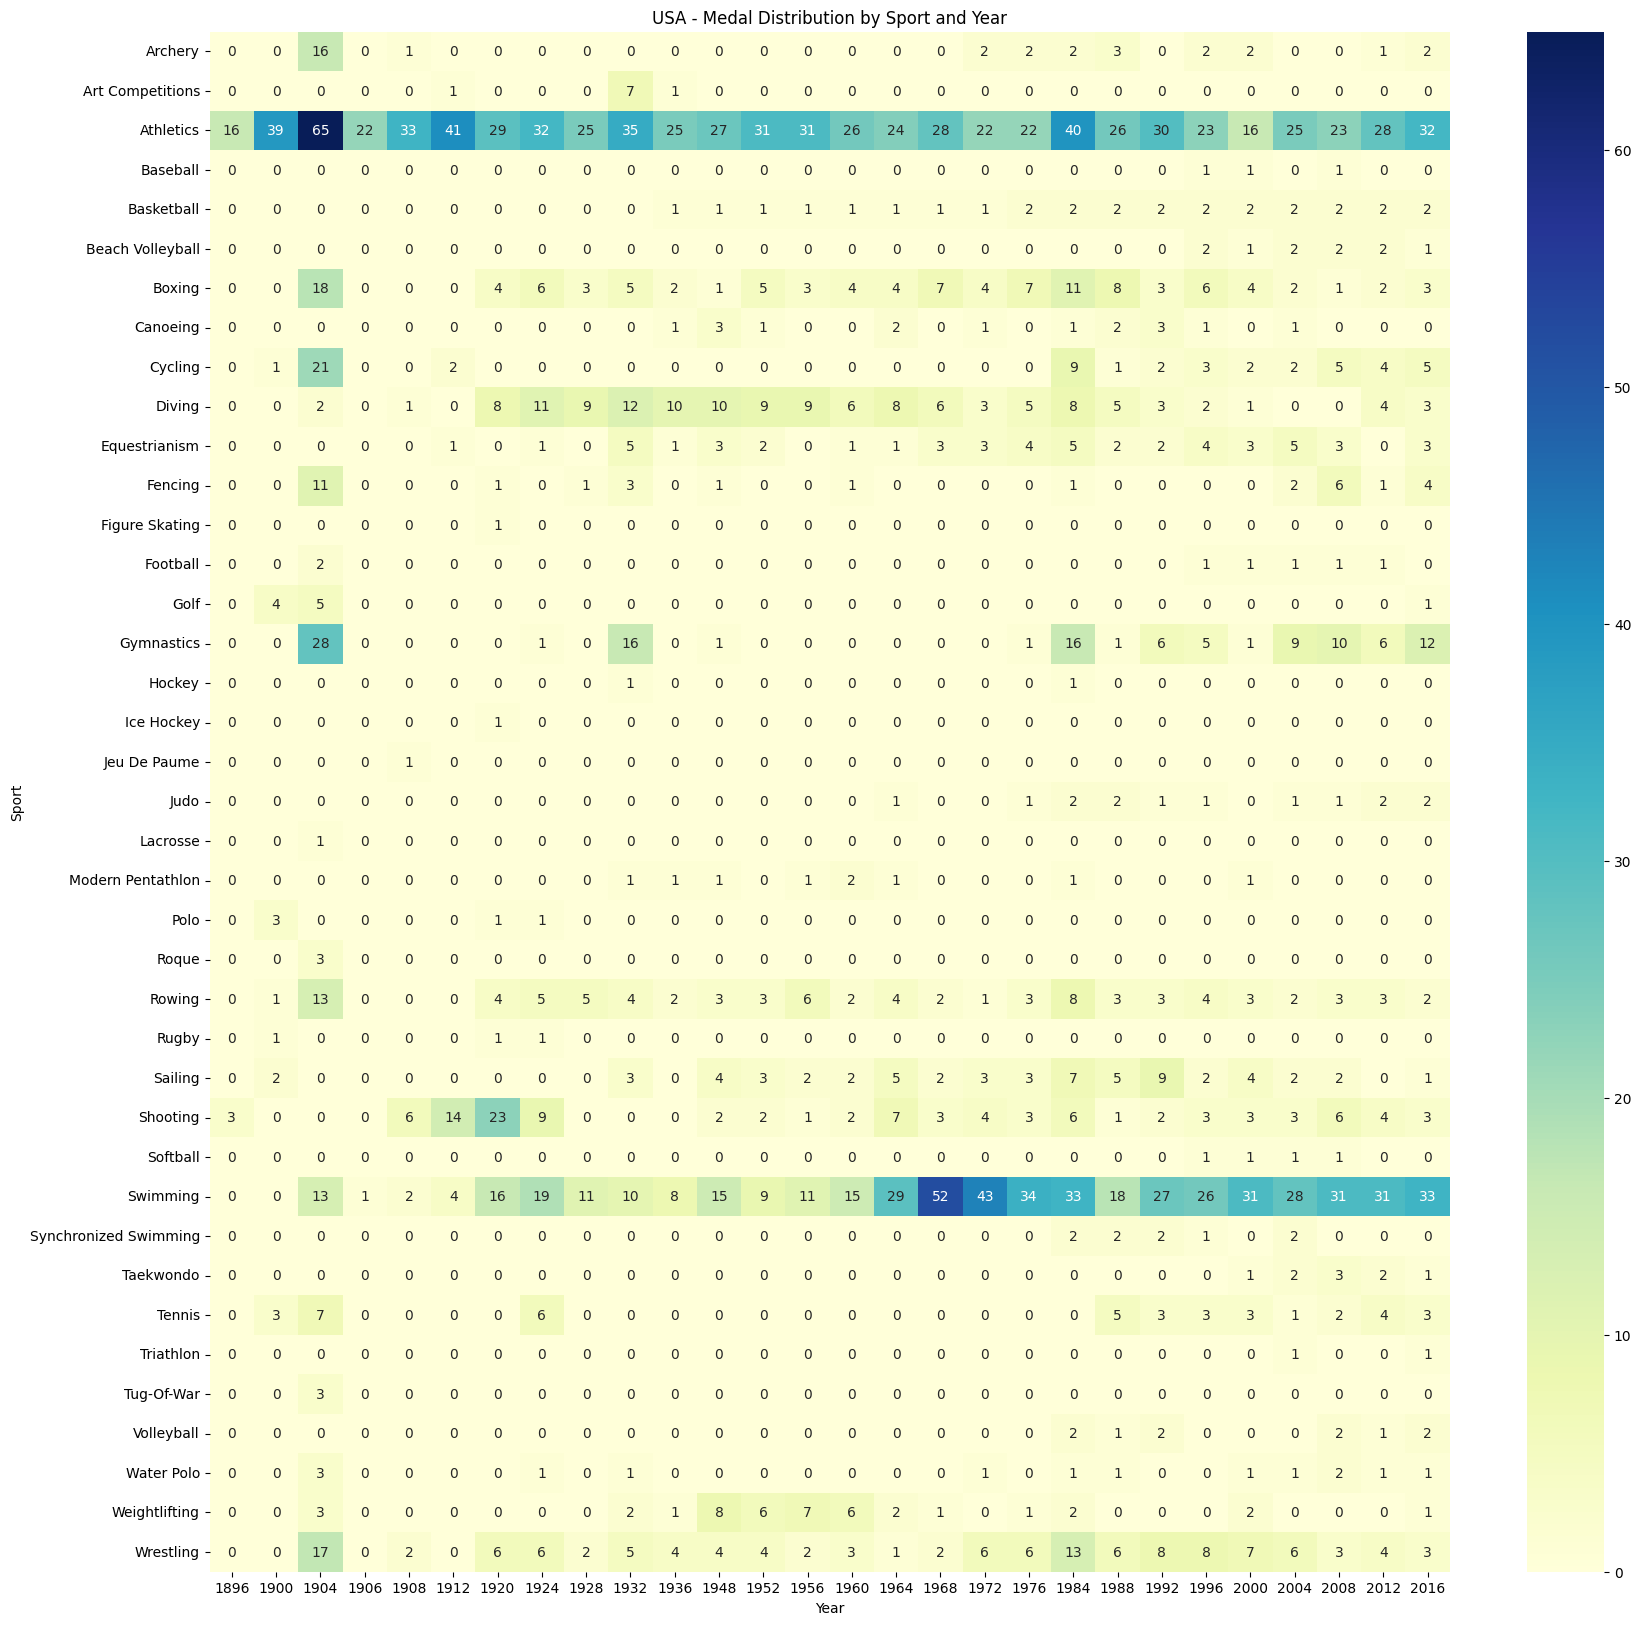

In [249]:
# --- Heatmap: Sport vs Year for a Country ---
plt.figure(figsize=(20, 20))
pivot = new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0).astype(int)
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title(f'{country} - Medal Distribution by Sport and Year')
plt.show()

In [251]:
# --- Most Successful Athletes from a Country ---
def most_successful(df, county):
    temp_df = df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region'] == county]

    x = temp_df['Name'].value_counts().reset_index()
    x.columns = ['Name', 'Medals']
    x = x.head(10).merge(df, left_on='Name', right_on='Name', how='left')[['Name', 'Medals', 'Sport',]].drop_duplicates('Name')
    return x

In [252]:
print(f"Most Successful Athletes from USA:")
most_successful(df,'USA')

Most Successful Athletes from USA:


,Name,Medals,Sport
0,"Michael Fred Phelps, II",28,Swimming
30,Ryan Steven Lochte,12,Swimming
44,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
61,Natalie Anne Coughlin (-Hall),12,Swimming
73,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
86,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
98,Carl Townsend Osburn,11,Shooting
114,Mark Andrew Spitz,11,Swimming
126,"Raymond Clarence ""Ray"" Ewry",10,Athletics
136,"Frederick Carlton ""Carl"" Lewis",10,Athletics


In [253]:
# --- Age Distribution: All Athletes and Medalists ---
athlete_df = df.drop_duplicates(subset=['Name', 'region'])
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

fig = ff.create_distplot(
    [x1, x2, x3, x4],
    ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'],
    show_hist=False, show_rug=False
)
fig.update_layout(title_text='Age Distribution: All Athletes vs Medalists')
fig.show()

In [254]:
# --- Age Distribution of Gold Medalists in Famous Sports ---
x = []
name = []
famous_sports = [
    'Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
    'Swimming', 'Badminton', 'Sailing', 'Gymnastics', 'Art Competitions',
    'Handball', 'Weightlifting', 'Wrestling', 'Water Polo', 'Hockey',
    'Rowing', 'Fencing', 'Shooting', 'Boxing', 'Taekwondo', 'Cycling',
    'Diving', 'Canoeing', 'Tennis', 'Golf', 'Softball', 'Archery',
    'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
    'Rhythmic Gymnastics', 'Rugby Sevens', 'Beach Volleyball',
    'Triathlon', 'Rugby', 'Polo', 'Ice Hockey'
]
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    gold_medal_ages = temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna()
    if not gold_medal_ages.empty:
        x.append(gold_medal_ages)
        name.append(sport)

fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.update_layout(title_text='Age Distribution of Gold Medalists in Famous Sports')
fig.show()

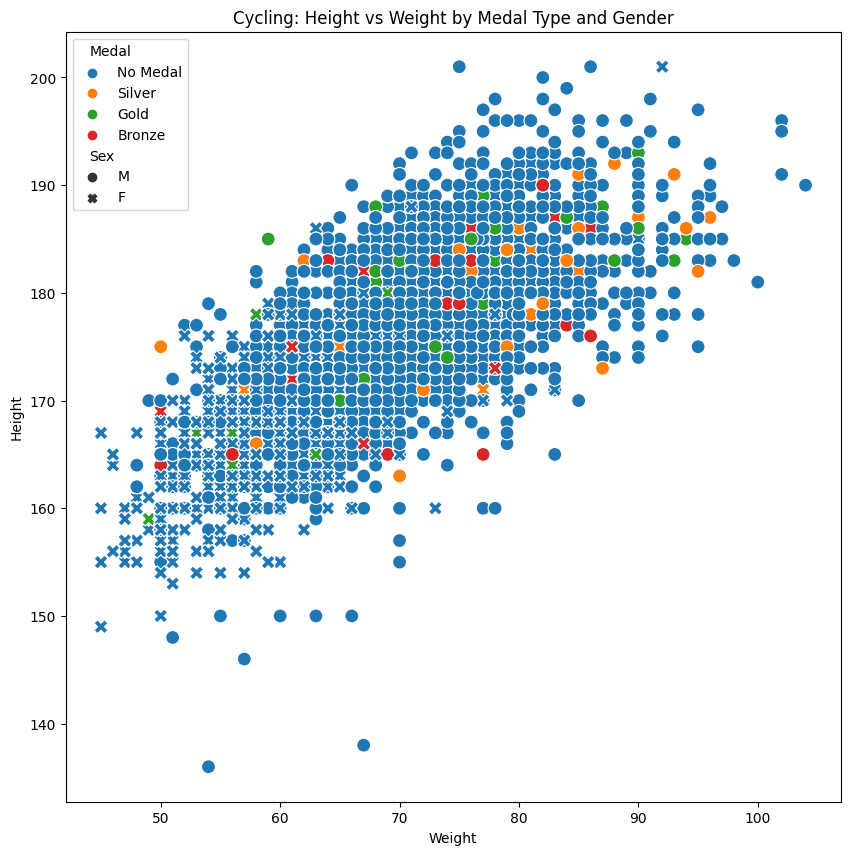

In [255]:
# --- Height vs Weight Scatter by Medal Type for a Sport (e.g., Cycling) ---
athlete_df['Medal'].fillna('No Medal', inplace=True)
plt.figure(figsize=(10, 10))
temp_df = athlete_df[athlete_df['Sport'] == 'Cycling']
sns.scatterplot(data=temp_df, x='Weight', y='Height', hue='Medal', style='Sex', s=100)
plt.title('Cycling: Height vs Weight by Medal Type and Gender')
plt.show()

In [256]:
# --- Participation: Men vs Women Over Time ---
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year')['Name'].count().reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year')['Name'].count().reset_index()
final = men.merge(women, on='Year', how='inner')
final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)

fig = px.line(final, x='Year', y=['Male', 'Female'], title='Olympic Participation: Men vs Women Over Time')
fig.show()

### Final Note

Thank you for exploring the "120 Years of Olympic History: Athletes and Results" project!  
This analysis provided insights into the evolution of the Olympic Games, medal tallies, athlete demographics, and trends across nations and sports.

Feel free to build on this work, explore new angles, or visualize the data further.  
If you have suggestions or questions, please open an issue or contribute.

### Connect with Me  

Feel free to follow me on these platforms:  

[![Kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/adilshamim8)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/adilshamim8)  
[![Twitter](https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://x.com/adil_shamim8)  